# K- Nearest Neighbouring  Clustering

In [3]:
# Importing the libraries needed 
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import random as rd

In [4]:
# Importing the datasets needed
df_train = pd.read_csv('emnist-letters-train.csv' , header=None)
df_test = pd.read_csv('emnist-letters-test.csv' , header =None)

In [5]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88795,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88796,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88798,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14796,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14797,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14798,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Seperating Labels and its corresponding values 

# For labels
y_train = df_train.iloc[:,0:1].values
y_test = df_test.iloc[:,0:1].values

# Seperating x features
X_train = df_train.iloc[:,1:785].values
X_test = df_test.iloc[:,1:785].values

In [18]:
# Scaling X 
X_train = (X_train)
X_train
y_train

array([[23],
       [ 7],
       [16],
       ...,
       [ 1],
       [23],
       [12]])

In [19]:
# Scaling X
X_test = X_test

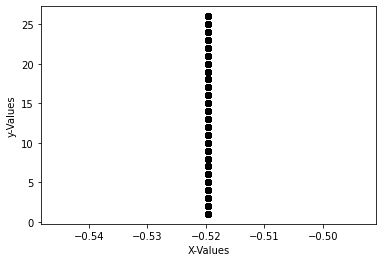

In [10]:
pp.scatter(X_train[:,0],y_train,c='black')
pp.xlabel('X-Values')
pp.ylabel('y-Values')
pp.show()

####Setting Hyperparameters


Choose the number of clusters (k)

In [11]:
#@title Number of Clusters
K = 26 #@param {type:"slider", min:2, max:50, step:1}
K_value = K

In [20]:
y_train[0]

array([23])

In [21]:
def euclidean_distance(row_1 , row_2):
  dist_sq = (row_1- row_2)**2
  element = np.sum(dist_sq,axis=1)
  dist = np.sqrt(element)
   
  return dist

X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
m,n= X_train.shape
m_test,n_test= X_test.shape
k=5
y_pred=np.zeros((m_test,1))
for i in range (m_test):
    diff=X_train-(X_test[i,:])
    diff_sqr=diff**2
    sum_diff_sqr=(np.sum(diff_sqr,axis=1))
    dist=np.sqrt(sum_diff_sqr)
    argsort=np.argsort(dist)
    argsort=argsort[:5]
    count=np.zeros((n,1))
    for j in argsort:
        count[y_train[j]-1]+=1
        pred=(np.argmax(count))+1
        y_pred[i]=pred
        print(y_pred[i])
            

Streaming output truncated to the last 5000 lines.
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[15.]
[15.]
[15.]
[15.]
[15.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[15.]
[15.]
[15.]
[15.]
[15.]
[1.]
[1.]
[1.]
[1.]
[1.]
[4.]
[4.]
[1.]
[1.]
[10.]
[1.]
[1.]
[1.]
[1.]
[1.]
[15.]
[15.]
[15.]
[15.]
[15.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[8.]
[8.]
[8.]
[8.]
[8.]
[15.]
[1

In [ ]:
count=0
for i in range(y_test.size):
    
    if(y_test[i]==y_pred[i]):
         count+=1
count/m *100 

# K-Means Clustering

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as pp
import random as rd

In [ ]:
data = pd.read_csv('emnist-letters-train.csv')
data = np.array(data)

In [ ]:
# Seperating Labels and its corresponding values 

# For labels
y = data[:,0:1]
# Seperating x features
X = data[:,1:785]

m,n = X.shape
n_iters = 100

In [6]:
# Number of clusters
K =26

In [8]:
#Centroids is a n x K dimentional matrix, where each column will be a centroid for one cluster.
Centroids=np.array([]).reshape(n,0) 

In [11]:
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

In [34]:
Output={}

EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
      tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
      EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)

In [40]:
C.reshape(14800,1)

array([[ 3],
       [ 2],
       [14],
       ...,
       [18],
       [23],
       [ 2]])

In [49]:
for i in range(n_iters):
     #step 2.a
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(784,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

In [81]:
Y

{1: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 2: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 3: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 4: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.,

In [56]:
Y[2].shape

(354, 784)